In [5]:
!wget https://raw.githubusercontent.com/spmallick/learnopencv/refs/heads/master/HandPose/hand/pose_deploy.prototxt

--2025-06-05 14:57:50--  https://raw.githubusercontent.com/spmallick/learnopencv/refs/heads/master/HandPose/hand/pose_deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26452 (26K) [text/plain]
Saving to: ‘pose_deploy.prototxt.1’

pose_deploy.prototx 100%[===================>]  25.83K  --.-KB/s    in 0.001s  

2025-06-05 14:57:50 (27.6 MB/s) - ‘pose_deploy.prototxt.1’ saved [26452/26452]



In [6]:
!wget https://huggingface.co/camenduru/openpose/resolve/5e17f6ad43ab415a0114537541a8d37d2503424f/models/hand/pose_iter_102000.caffemodel
     

--2025-06-05 14:57:50--  https://huggingface.co/camenduru/openpose/resolve/5e17f6ad43ab415a0114537541a8d37d2503424f/models/hand/pose_iter_102000.caffemodel
Resolving huggingface.co (huggingface.co)... 3.168.178.31, 3.168.178.122, 3.168.178.101, ...
Connecting to huggingface.co (huggingface.co)|3.168.178.31|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/86/05/8605ab3f750a36cde723f9dfd9634b742108bef91ecb311901ff13749b9dafac/f313aa5ef031ac91606e1a0383daa14be241a6e1a91c1155283dd28503c79c2d?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27pose_iter_102000.caffemodel%3B+filename%3D%22pose_iter_102000.caffemodel%22%3B&Expires=1749106671&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0OTEwNjY3MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzg2LzA1Lzg2MDVhYjNmNzUwYTM2Y2RlNzIzZjlkZmQ5NjM0Yjc0MjEwOGJlZjkxZWNiMzExOTAxZmYxMzc0OWI5ZGFmYWMvZjMxM2FhNWVmMDMxYWM5MTYwN

In [7]:
!wget https://raw.githubusercontent.com/spmallick/learnopencv/refs/heads/master/HandPose/right-frontal.jpg

--2025-06-05 14:57:53--  https://raw.githubusercontent.com/spmallick/learnopencv/refs/heads/master/HandPose/right-frontal.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223613 (218K) [image/jpeg]
Saving to: ‘right-frontal.jpg.1’

right-frontal.jpg.1 100%[===================>] 218.37K  --.-KB/s    in 0.02s   

2025-06-05 14:57:53 (13.6 MB/s) - ‘right-frontal.jpg.1’ saved [223613/223613]



In [8]:
import cv2
import time
import numpy as np

protoFile = "pose_deploy.prototxt"
weightsFile = "pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [0, 5],
    [5, 6],
    [6, 7],
    [7, 8],
    [0, 9],
    [9, 10],
    [10, 11],
    [11, 12],
    [0, 13],
    [13, 14],
    [14, 15],
    [15, 16],
    [0, 17],
    [17, 18],
    [18, 19],
    [19, 20],
]
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [9]:
frame = cv2.imread("right-frontal.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth / frameHeight
threshold = 0.1

t = time.time()
# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio * inHeight) * 8) // 8)
inpBlob = cv2.dnn.blobFromImage(
    frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False
)

net.setInput(inpBlob)

output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 2.273


Total time taken : 2.979


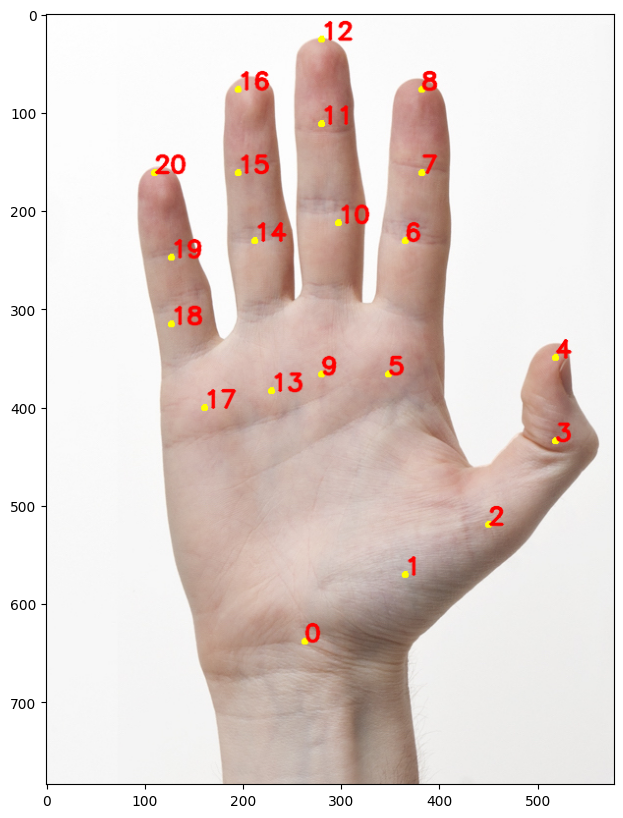

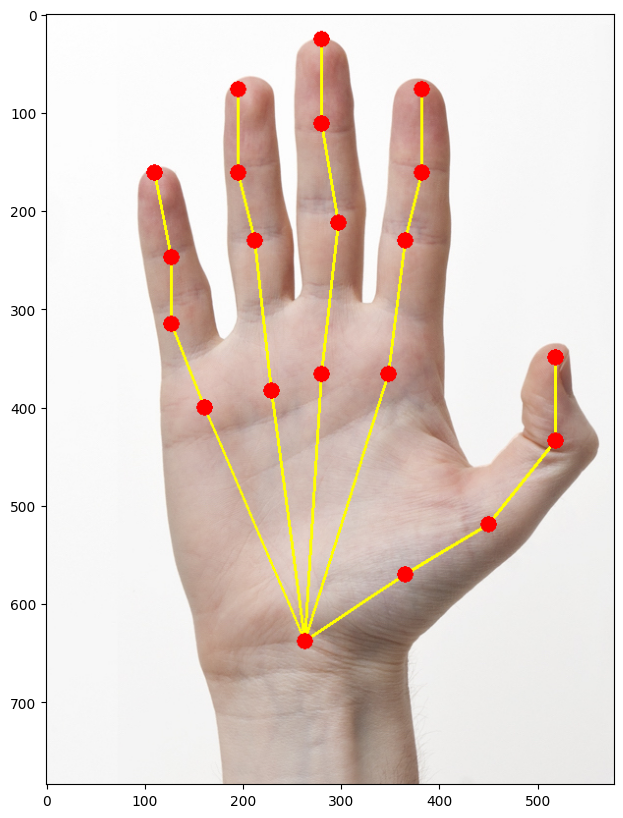

In [10]:
import matplotlib.pyplot as plt

# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold:
        cv2.circle(
            frameCopy,
            (int(point[0]), int(point[1])),
            3,
            (0, 255, 255),
            thickness=-1,
            lineType=cv2.FILLED,
        )
        cv2.putText(
            frameCopy,
            "{}".format(i),
            (int(point[0]), int(point[1])),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            (0, 0, 255),
            2,
            lineType=cv2.LINE_AA,
        )

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else:
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(
            frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED
        )
        cv2.circle(
            frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED
        )


plt.figure(figsize=[10, 10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10, 10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


cv2.imwrite("Output-Keypoints.jpg", frameCopy)
cv2.imwrite("Output-Skeleton.jpg", frame)

print("Total time taken : {:.3f}".format(time.time() - t))